# ACTION RECOGNITON

In [67]:
import pandas as pd

In [68]:
data = pd.read_csv('./static_data.csv')
data

frame_id  tracker_id  class_id          x1          y1          x2  \
0            1           1       1.0  577.747900  277.712860  693.367550   
1            1           2       0.0  452.035770  270.949770  472.346680   
2            1           3       0.0  123.372500  263.265200  140.497130   
3            1           4       2.0  239.766850  240.994930  309.510250   
4            1           5       0.0  361.826300  262.514950  384.866200   
...        ...         ...       ...         ...         ...         ...   
1478       229           4       2.0  234.196172  236.963811  362.338793   
1479       229           2       0.0  388.600209  265.051669  408.709896   
1480       229           5       0.0  504.101156  268.913999  527.104933   
1481       229          12       0.0  546.929126  264.964376  573.823314   
1482       229          11       0.0  619.104268  272.824589  641.215823   

              y2  
0     324.325300  
1     317.761350  
2     304.339780  
3     299.011170  
4     314.113700  
...          ...  
1478  299.793090  
1479  313.634214  
1480  316.952430  
1481  319.744428  
1482  322.426264  

[1483 rows x 7 columns]

# B. Personnel Gathering

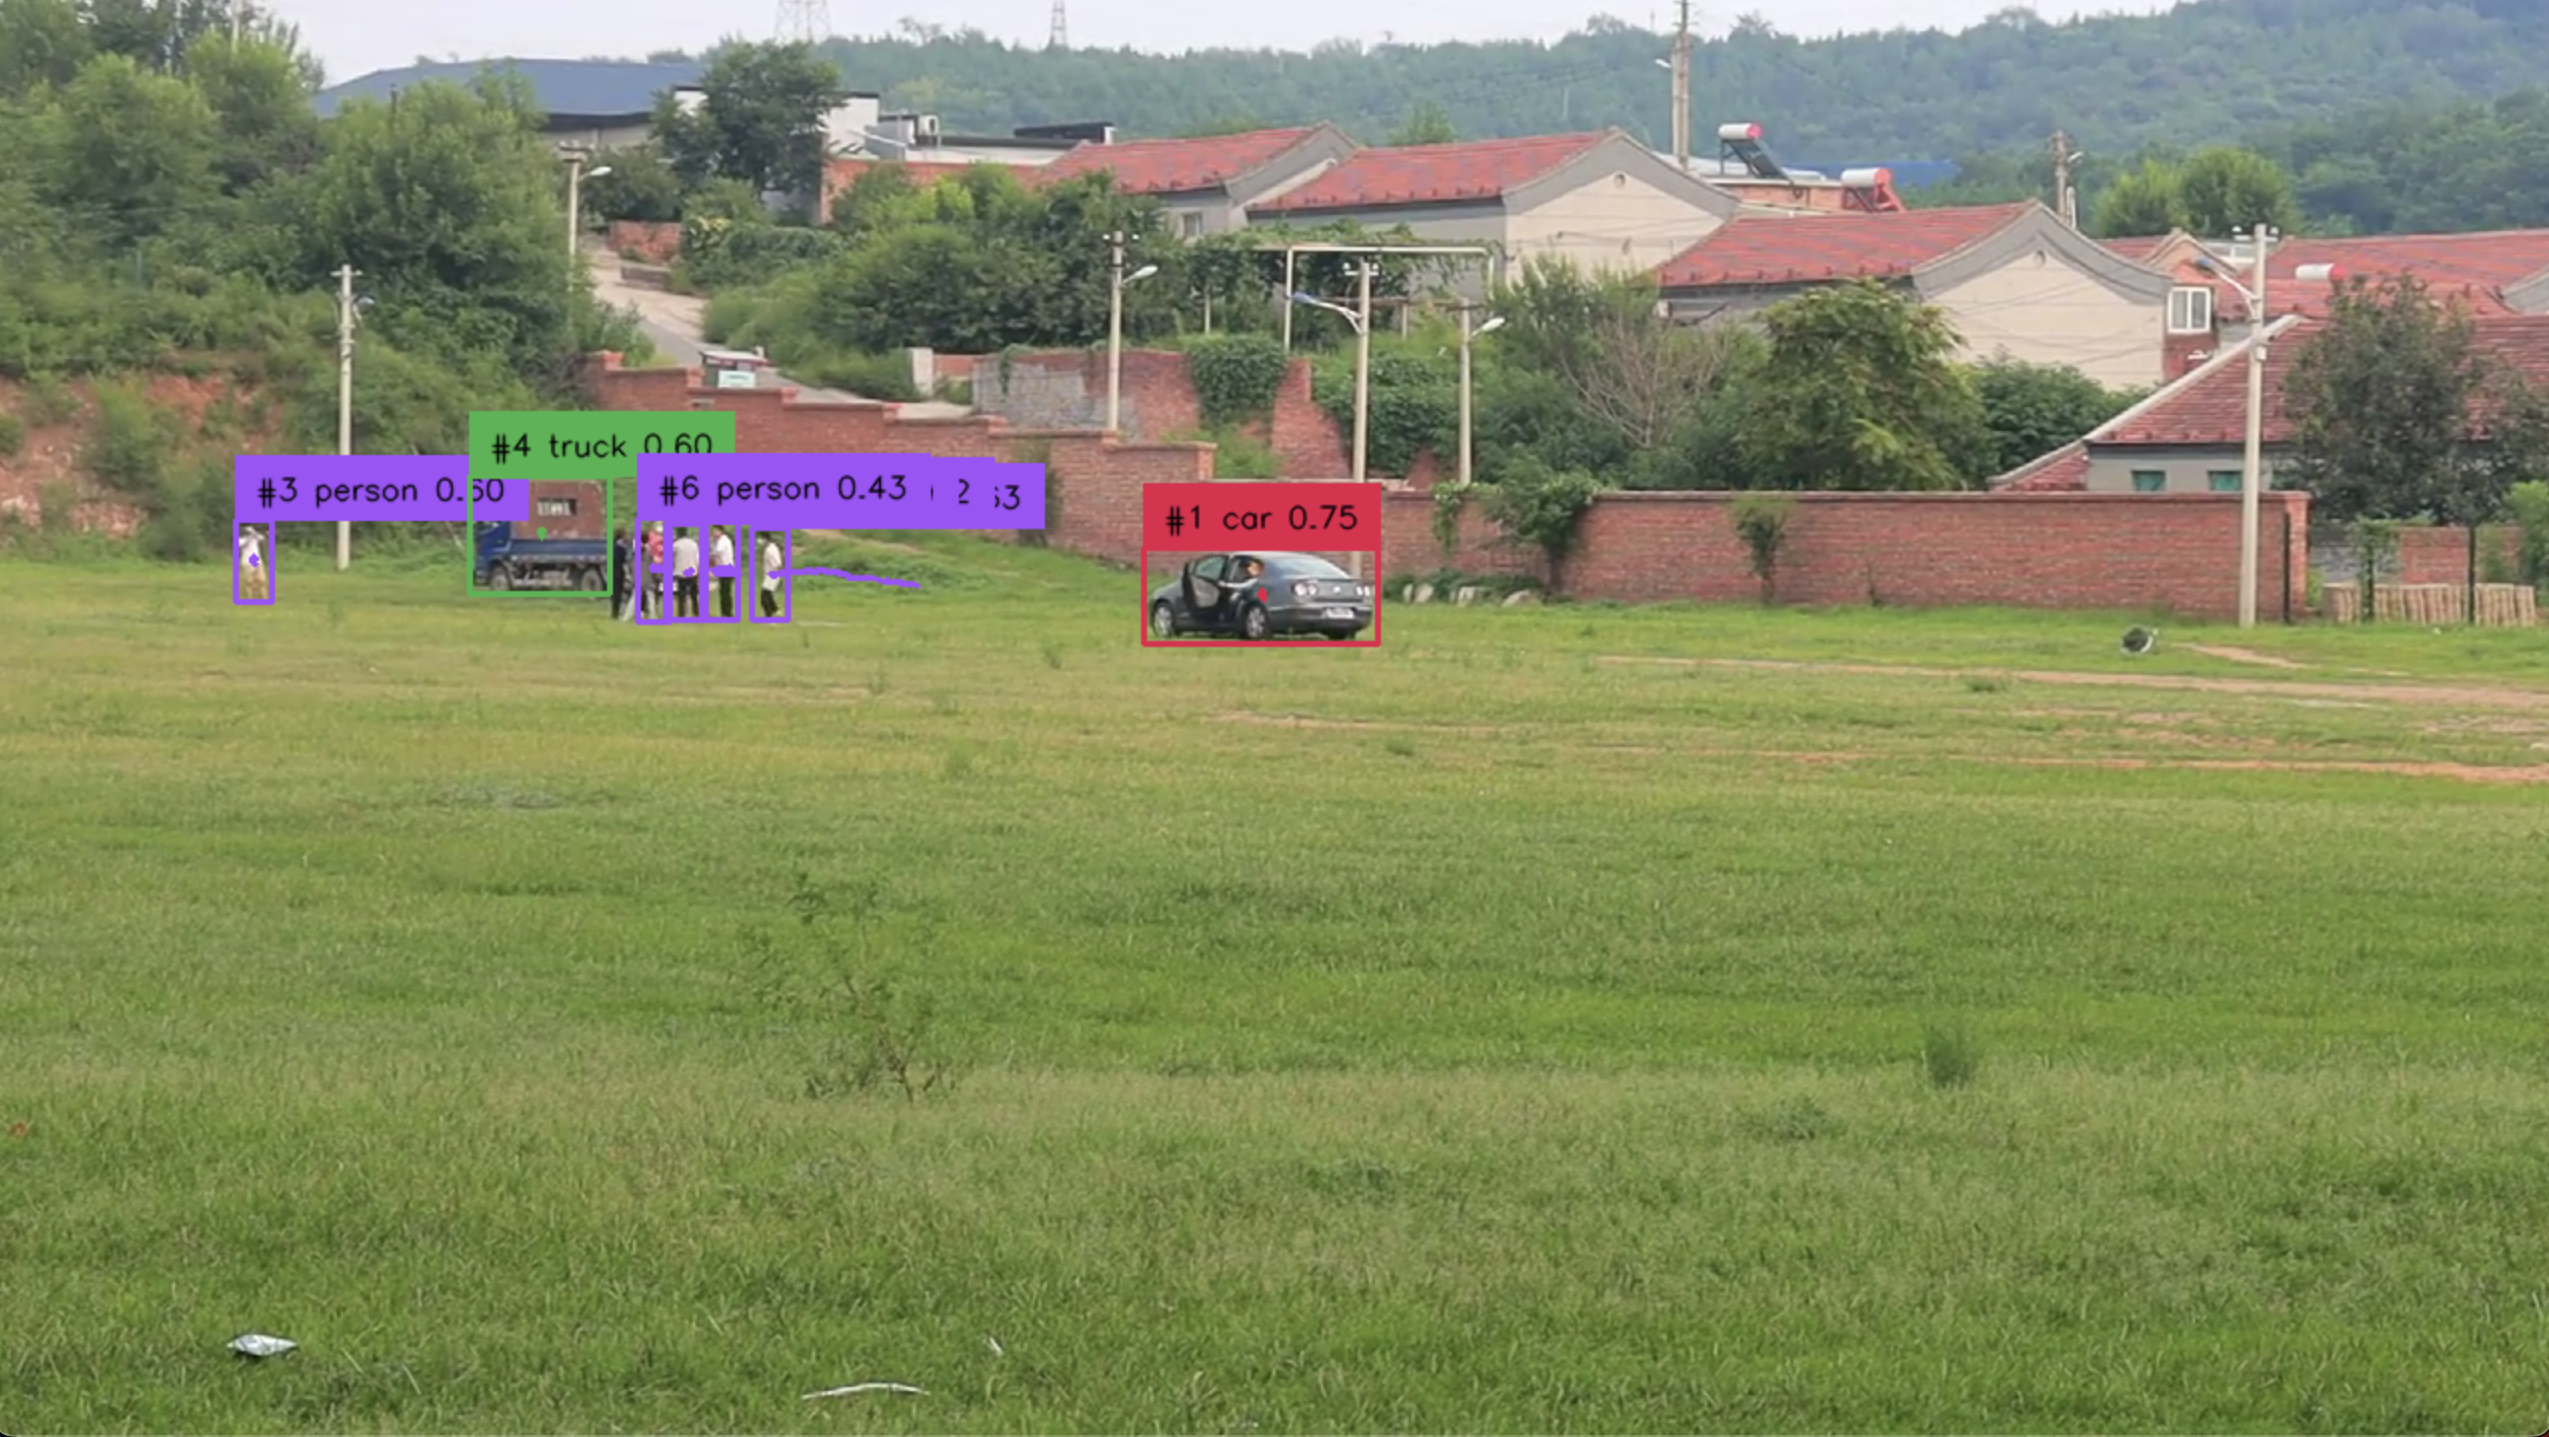

In [78]:
from IPython.display import Image
Image(filename="./frame_61.png", width=1000)

In [79]:
frame_id = 61
b_df = data[data['frame_id']==frame_id].reset_index()
b_df

index  frame_id  tracker_id  class_id          x1          y1          x2  \
0    348        61           1       1.0  575.915447  275.767607  692.620026   
1    349        61           2       0.0  379.383501  266.188153  397.456175   
2    350        61           3       0.0  121.262351  261.623206  139.156723   
3    351        61           4       2.0  238.366149  239.917396  308.672853   
4    352        61           5       0.0  354.597980  262.950904  372.401213   
5    353        61           7       0.0  336.815411  263.679067  356.327257   
6    354        61           6       0.0  323.139244  260.761417  339.119647   

           y2  
0  323.870486  
1  312.012600  
2  303.000299  
3  298.192788  
4  311.840058  
5  312.145701  
6  312.511606

We want a measure that asigns gathering to objects: 2,5,6,7

In [81]:
one = b_df[b_df['tracker_id'] == 1][['x1','y1', 'x2', 'y2']].values.tolist()[0]
two = b_df[b_df['tracker_id'] == 2][['x1','y1', 'x2', 'y2']].values.tolist()[0]
three = b_df[b_df['tracker_id'] == 3][['x1','y1', 'x2', 'y2']].values.tolist()[0]
four = b_df[b_df['tracker_id'] == 4][['x1','y1', 'x2', 'y2']].values.tolist()[0]
five = b_df[b_df['tracker_id'] == 5][['x1','y1', 'x2', 'y2']].values.tolist()[0]
six = b_df[b_df['tracker_id'] == 6][['x1','y1', 'x2', 'y2']].values.tolist()[0]
seven = b_df[b_df['tracker_id'] == 7][['x1','y1', 'x2', 'y2']].values.tolist()[0]

In [84]:
import numpy as np

def compute_distance(bb1, bb2):
    x_cm_1 = bb1[0] + (bb1[2] - bb1[0])/2
    y_cm_1 = bb1[1] + (bb1[3] - bb1[1])/2
    x_cm_2 = bb2[0] + (bb2[2] - bb2[0])/2
    y_cm_2 = bb2[1] + (bb2[3] - bb2[1])/2

    a1 = (bb1[2] - bb1[0])*(bb1[3] - bb1[1])
    a2 = (bb2[2] - bb2[0])*(bb2[3] - bb2[1])

    return np.sqrt((x_cm_1-x_cm_2)**2 + (y_cm_1-y_cm_2)**2)/np.sqrt((a1+a2)/2)   

In [86]:
# Car with crowd
compute_distance(one, two)

4.335943657710696

In [87]:
# Car with truck
compute_distance(one, four)

5.195905138346291

In [88]:
# Car with lone
compute_distance(one, three)

8.947991483857807

In [89]:
# Truck with lone
compute_distance(four, three)

2.926362023818521

In [90]:
# Truck with crowd
compute_distance(four, six)

1.2139035508740106

In [91]:
# Lone with crowd
compute_distance(three, six)

7.178733159332969

In [100]:
# Crowd with itself
print(compute_distance(two, six))
print(compute_distance(two, seven))
print(compute_distance(two, five))
print(compute_distance(six, seven))
print(compute_distance(six, five))
print(compute_distance(seven, five))

# Try 1 as thresh since it is concatenation

1.9933252838624411
1.4057632218147795
0.8571195191890186
0.520450905017492
1.11145097764941
0.5620369160971675


In [101]:
from itertools import combinations

pairs = []
# TODO: not even filtering by class id
for id1, id2 in combinations(b_df['tracker_id'], 2):
    one = b_df[b_df['tracker_id'] == id1][['x1','y1', 'x2', 'y2']].values.tolist()[0]
    two = b_df[b_df['tracker_id'] == id2][['x1','y1', 'x2', 'y2']].values.tolist()[0]
    nd = compute_distance(one, two)
    if nd<=1:
        pairs.append([id1, id2])

print(pairs)

[[2, 5], [5, 7], [7, 6]]


In [102]:
import networkx as nx

#pairs = [[1, 2], [3, 4], [4, 1], [6, 5], [6, 7], [9, 8]]

# Create an undirected graph from the pairs
G = nx.Graph()
G.add_edges_from(pairs)

# Find the connected components
independent_chains = list(nx.connected_components(G))

# Filter out chains smaller than 2 elements (single nodes)
longest_chains = [chain for chain in independent_chains if len(chain) > 2]

print("Longest independent chains:")
for chain in longest_chains:
    print(list(chain))


Longest independent chains:
[2, 5, 6, 7]


In [ ]:
# TODO: test with a more complex scenario where there are different scales!!
# TODO: should we add a condition for the areas to have a similar size? a1/2 € [0.6,0.6**(-1)]

In [104]:
b_df['a'] = (b_df['x2']-b_df['x1'])*(b_df['y2']-b_df['y1'])
b_df

index  frame_id  tracker_id  class_id          x1          y1          x2  \
0    348        61           1       1.0  575.915447  275.767607  692.620026   
1    349        61           2       0.0  379.383501  266.188153  397.456175   
2    350        61           3       0.0  121.262351  261.623206  139.156723   
3    351        61           4       2.0  238.366149  239.917396  308.672853   
4    352        61           5       0.0  354.597980  262.950904  372.401213   
5    353        61           7       0.0  336.815411  263.679067  356.327257   
6    354        61           6       0.0  323.139244  260.761417  339.119647   

           y2            a  
0  323.870486  5613.826221  
1  312.012600   828.170266  
2  303.000299   740.417071  
3  298.192788  4097.150689  
4  311.840058   870.384993  
5  312.145701   945.673493  
6  312.511606   826.988867

In [109]:
one = b_df[b_df['tracker_id'] == 1]['a'].values[0]
two = b_df[b_df['tracker_id'] == 2]['a'].values[0]
three = b_df[b_df['tracker_id'] == 3]['a'].values[0]
four = b_df[b_df['tracker_id'] == 4]['a'].values[0]
five = b_df[b_df['tracker_id'] == 5]['a'].values[0]
six = b_df[b_df['tracker_id'] == 6]['a'].values[0]
seven = b_df[b_df['tracker_id'] == 7]['a'].values[0]

In [119]:
# Crowd with itself
print(min(two, five)/max(two, five))
print(two/five)
print(five/two)
print('')
print(two/six)
print(six/two)
print('')
print(two/seven)
print(seven/two)
print('')
print(five/seven)
print(seven/five)
print('')
print(five/six)
print(six/five)
print('')
print(seven/six)
print(six/seven)

0.9514987888769192
0.9514987888769192
1.0509734869766132

1.0014285551345703
0.9985734827240088

0.8757465151435557
1.1418829338259784

0.9203863687280401
1.0865002285746417

1.0524748605477308
0.9501414594165016

1.1435141765541736
0.8744972476103144


In [120]:
# Truck with seven (big)
print(seven/four)
print(four/seven)

0.23081247563468016
4.33252144300361


In [121]:
# Car with seven (big)
print(seven/one)
print(one/seven)

0.16845435825641525
5.936326078769867


In [122]:
# Car with truck
print(four/one)
print(one/four)

0.7298321193133313
1.3701781184155866


In [126]:
# FINAL
from itertools import combinations

pairs = []
bdf_filtered = b_df[b_df['class_id'] == 0]
for id1, id2 in combinations(bdf_filtered['tracker_id'], 2):
    one = bdf_filtered[bdf_filtered['tracker_id'] == id1][['x1','y1', 'x2', 'y2']].values.tolist()[0]
    two = bdf_filtered[bdf_filtered['tracker_id'] == id2][['x1','y1', 'x2', 'y2']].values.tolist()[0]

    a1 = (one[2]-one[0])*(one[3]-one[1])
    a2 = (two[2]-two[0])*(two[3]-two[1])
    
    nd = compute_distance(one, two)
    if (nd<=1) and ((0.6) < a1/a2 < (0.6)**(-1)):
        pairs.append([id1, id2])

print(pairs)

[[2, 5], [5, 7], [7, 6]]


# D.1. Loitering (Standing Still)

In [140]:
def compute_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : list
        Values: ['x1', 'x2', 'y1', 'y2']
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : list
        Values: ['x1', 'x2', 'y1', 'y2']
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [159]:
p3_df = data[data['tracker_id']==3]
p3_df

frame_id  tracker_id  class_id          x1          y1          x2  \
2            1           3       0.0  123.372500  263.265200  140.497130   
7            2           3       0.0  123.119797  263.261384  140.304693   
12           3           3       0.0  122.915136  263.249470  140.102850   
17           4           3       0.0  122.728994  263.056562  139.988103   
22           5           3       0.0  122.360126  262.749494  139.846428   
...        ...         ...       ...         ...         ...         ...   
1449       225           3       0.0  116.217165  256.792856  134.628925   
1456       226           3       0.0  116.257357  256.881590  134.822062   
1463       227           3       0.0  116.345540  256.994692  135.127250   
1470       228           3       0.0  116.388849  257.181253  135.319011   
1477       229           3       0.0  116.401915  257.210311  135.414318   

              y2  
2     304.339780  
7     304.472617  
12    304.446727  
17    304.380904  
22    304.563969  
...          ...  
1449  298.972173  
1456  299.268868  
1463  299.721104  
1470  300.094248  
1477  300.167623  

[229 rows x 7 columns]

In [160]:
current_frame_id = 61

In [161]:
ss_buffer = 40
ss_list = []
iou_list = []

for i in reversed(range(ss_buffer)):
    one = p3_df[p3_df['frame_id'] == current_frame_id - i][['x1','y1', 'x2', 'y2']].values.tolist()[0]
    two = p3_df[p3_df['frame_id'] == current_frame_id - i + 1][['x1','y1', 'x2', 'y2']].values.tolist()[0]
    iou = compute_iou(one, two)

    iou_list.append(iou)
    ss_list.append(iou>=0.8)

print(ss_list)
print(iou_list)

percentage = sum(ss_list)/len(ss_list)
if percentage >= 0.9:
    first = p3_df[p3_df['frame_id'] == current_frame_id - ss_buffer][['x1','y1', 'x2', 'y2']].values.tolist()[0]
    last = p3_df[p3_df['frame_id'] == current_frame_id][['x1','y1', 'x2', 'y2']].values.tolist()[0]
    iou = compute_iou(first, last)
    print(iou)
    if iou>=0.8:
        print('Standing Still')


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[0.9691686408585407, 0.9854804304859172, 0.9866006980114355, 0.990711471601713, 0.992581614725943, 0.9927384443716336, 0.9927037507638444, 0.9831937408009991, 0.9922842529634367, 0.9726807918376308, 0.9595648585878789, 0.9811079194723635, 0.9686680023860096, 0.9858474629390759, 0.9787111794408854, 0.992549848517412, 0.9948386430489544, 0.9745237322165923, 0.9816093771060054, 0.964200254468049, 0.9455505136131064, 0.9449699789294341, 0.981435600190639, 0.9475194198871091, 0.9811416682036953, 0.9557022845722974, 0.966635653531031, 0.9711546119060258, 0.9834086816350911, 0.96242049235441, 0.9804934356684787, 0.987032965138769, 0.9795415261534243, 0.992025093106962, 0.9906699289820219, 0.9879408101864741, 0.9841336441863953, 0.9848012861555392, 0.982855

In [146]:
# Now lets test a negative example

In [169]:
p6_df = data[data['tracker_id']==6]
p6_df = p6_df.sort_values('frame_id', ascending=False).reset_index()
p6_df

index  frame_id  tracker_id  class_id          x1          y1          x2  \
0     959       162           6       0.0  326.048151  263.884593  341.413948   
1     951       161           6       0.0  326.262978  264.330359  341.325163   
2     943       160           6       0.0  326.744655  264.727907  341.610620   
3     935       159           6       0.0  326.805463  264.775280  341.642481   
4     927       158           6       0.0  326.955827  264.573561  341.924814   
..    ...       ...         ...       ...         ...         ...         ...   
82    154        30           6       0.0  322.619153  259.822455  337.628455   
83    148        29           6       0.0  322.395322  259.421675  337.502205   
84    142        28           6       0.0  322.586836  259.463498  337.707263   
85    136        27           6       0.0  322.776060  259.390942  337.932802   
86    130        26           6       0.0  322.850500  259.281130  338.054660   

            y2  
0   307.992778  
1   307.932733  
2   308.462557  
3   308.766674  
4   309.386775  
..         ...  
82  309.684547  
83  309.680971  
84  309.766684  
85  309.808179  
86  309.848750  

[87 rows x 8 columns]

frame_id  tracker_id  class_id          x1          y1          x2  \
959       162           6       0.0  326.048151  263.884593  341.413948   
951       161           6       0.0  326.262978  264.330359  341.325163   
943       160           6       0.0  326.744655  264.727907  341.610620   
935       159           6       0.0  326.805463  264.775280  341.642481   
927       158           6       0.0  326.955827  264.573561  341.924814   
..        ...         ...       ...         ...         ...         ...   
154        30           6       0.0  322.619153  259.822455  337.628455   
148        29           6       0.0  322.395322  259.421675  337.502205   
142        28           6       0.0  322.586836  259.463498  337.707263   
136        27           6       0.0  322.776060  259.390942  337.932802   
130        26           6       0.0  322.850500  259.281130  338.054660   

             y2  
959  307.992778  
951  307.932733  
943  308.462557  
935  308.766674  
927  309.386775  
..          ...  
154  309.684547  
148  309.680971  
142  309.766684  
136  309.808179  
130  309.848750  

[87 rows x 7 columns]